# Kod do wygenerownia i porównania różnych modeli klasyfikacji (Różne miary)

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
np.random.seed = 42

In [70]:
# Wczytanie danych
train_data = pd.read_csv("train_data_with_features.csv")
test_data = pd.read_csv("test_data_with_features.csv")

In [71]:
# Przygotowanie cech i etykiet
y_train = train_data['class']
X_train = train_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"], axis=1)
y_test = test_data['class']
X_test = test_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Zakodowanie etykiet w sposób jednolity
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)  

    # Trening modelu
    model.fit(X_train, y_train_encoded)
    
    # Predykcja na zbiorze treningowym i testowym
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Dokładności
    train_acc = accuracy_score(y_train_encoded, y_train_pred)
    test_acc = accuracy_score(y_test_encoded, y_test_pred)

    # Raporty klasyfikacji
    train_report = classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_.tolist())
    test_report = classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_.tolist())

    # Precision, Recall, F1 score
    train_precision = precision_score(y_train_encoded, y_train_pred, average='weighted')
    train_recall = recall_score(y_train_encoded, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train_encoded, y_train_pred, average='weighted')

    test_precision = precision_score(y_test_encoded, y_test_pred, average='weighted')
    test_recall = recall_score(y_test_encoded, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')

    # Macierze pomyłek
    train_cm = confusion_matrix(y_train_encoded, y_train_pred)
    test_cm = confusion_matrix(y_test_encoded, y_test_pred)

    # Wypisanie wyników
    print(f"\n📊 Dokładność (trening): {train_acc:.4f}")
    print(f"Precision (trening): {train_precision:.4f}")
    print(f"Recall (trening): {train_recall:.4f}")
    print(f"F1 Score (trening): {train_f1:.4f}")
    print("Raport klasyfikacji (trening):\n", train_report)

    print(f"\n📊 Dokładność (test): {test_acc:.4f}")
    print(f"Precision (test): {test_precision:.4f}")
    print(f"Recall (test): {test_recall:.4f}")
    print(f"F1 Score (test): {test_f1:.4f}")
    print("Raport klasyfikacji (test):\n", test_report)

    # Wizualizacja macierzy pomyłek
    plt.figure(figsize=(12, 6))

    # Macierz pomyłek dla zbioru treningowego
    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Macierz Pomyłek - Trening")
    plt.xlabel("Przewidywania")
    plt.ylabel("Rzeczywiste")

    # Macierz pomyłek dla zbioru testowego
    plt.subplot(1, 2, 2)
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Macierz Pomyłek - Test")
    plt.xlabel("Przewidywania")
    plt.ylabel("Rzeczywiste")

    # Wyświetlenie wykresu
    plt.tight_layout()
    plt.show()


## SoftVote Weights

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = RandomForestClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression( max_iter=1000)
estimators=[('RandomForest', model1), ('KNN', model2), ('LR', model3)]


📊 Dokładność (trening): 1.0000
Precision (trening): 1.0000
Recall (trening): 1.0000
F1 Score (trening): 1.0000
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       1.00      1.00      1.00       448
        Butka Ghevda       1.00      1.00      1.00       448
       Gabara Ghevda       1.00      1.00      1.00       447
             God Wal       1.00      1.00      1.00       448
          Hirva Lamb       1.00      1.00      1.00       448
            Kadu wal       1.00      1.00      1.00       444
            Kala Wal       1.00      1.00      1.00       448
     Lal lamb shenga       1.00      1.00      1.00       448
Lamb Shiracha Ghevda       1.00      1.00      1.00       448
      Shravan Ghevda       1.00      1.00      1.00       448
          Tambda wal       1.00      1.00      1.00       448
       Vatana Ghevda       1.00      1.00      1.00       448

            accuracy                           1

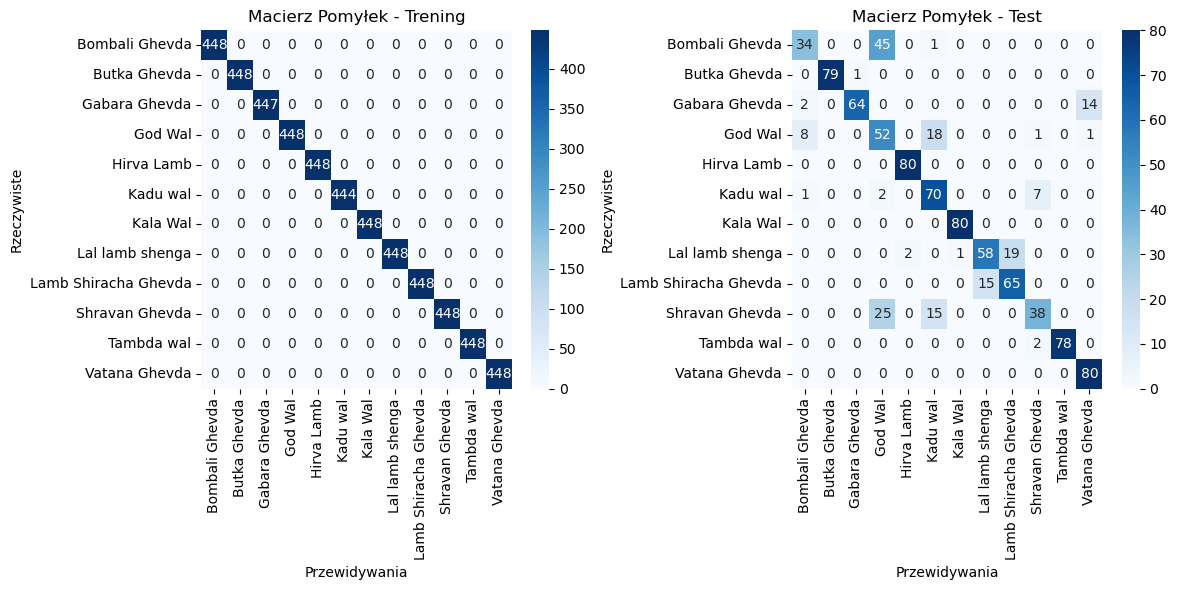

In [74]:
evaluate_model(model1, X_train, X_test, y_train, y_test)


📊 Dokładność (trening): 0.9823
Precision (trening): 0.9825
Recall (trening): 0.9823
F1 Score (trening): 0.9823
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.95      0.91      0.93       448
        Butka Ghevda       1.00      1.00      1.00       448
       Gabara Ghevda       1.00      1.00      1.00       447
             God Wal       0.91      0.95      0.93       448
          Hirva Lamb       1.00      0.99      1.00       448
            Kadu wal       0.97      0.97      0.97       444
            Kala Wal       1.00      1.00      1.00       448
     Lal lamb shenga       1.00      1.00      1.00       448
Lamb Shiracha Ghevda       1.00      1.00      1.00       448
      Shravan Ghevda       0.98      0.99      0.99       448
          Tambda wal       1.00      1.00      1.00       448
       Vatana Ghevda       0.99      0.98      0.99       448

            accuracy                           0

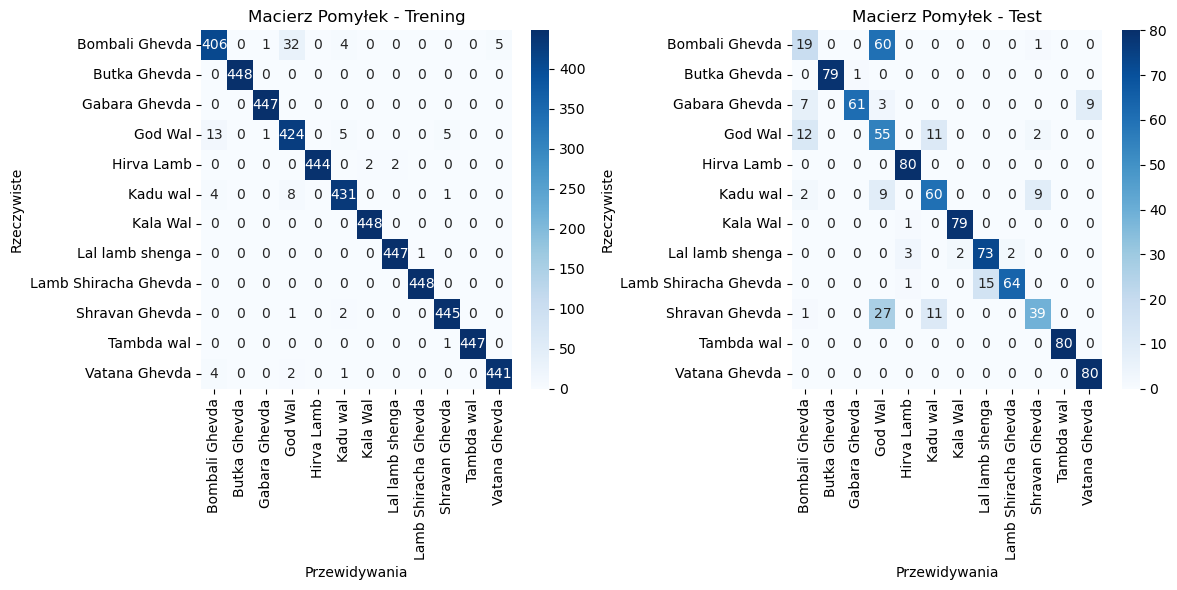

In [75]:
evaluate_model(model2, X_train, X_test, y_train, y_test)


📊 Dokładność (trening): 0.9117
Precision (trening): 0.9130
Recall (trening): 0.9117
F1 Score (trening): 0.9119
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.85      0.81      0.83       448
        Butka Ghevda       0.98      1.00      0.99       448
       Gabara Ghevda       0.99      0.98      0.98       447
             God Wal       0.80      0.86      0.83       448
          Hirva Lamb       0.92      0.85      0.88       448
            Kadu wal       0.89      0.95      0.92       444
            Kala Wal       0.89      0.90      0.89       448
     Lal lamb shenga       0.86      0.89      0.88       448
Lamb Shiracha Ghevda       0.91      0.92      0.91       448
      Shravan Ghevda       0.99      0.91      0.95       448
          Tambda wal       1.00      1.00      1.00       448
       Vatana Ghevda       0.89      0.88      0.88       448

            accuracy                           0

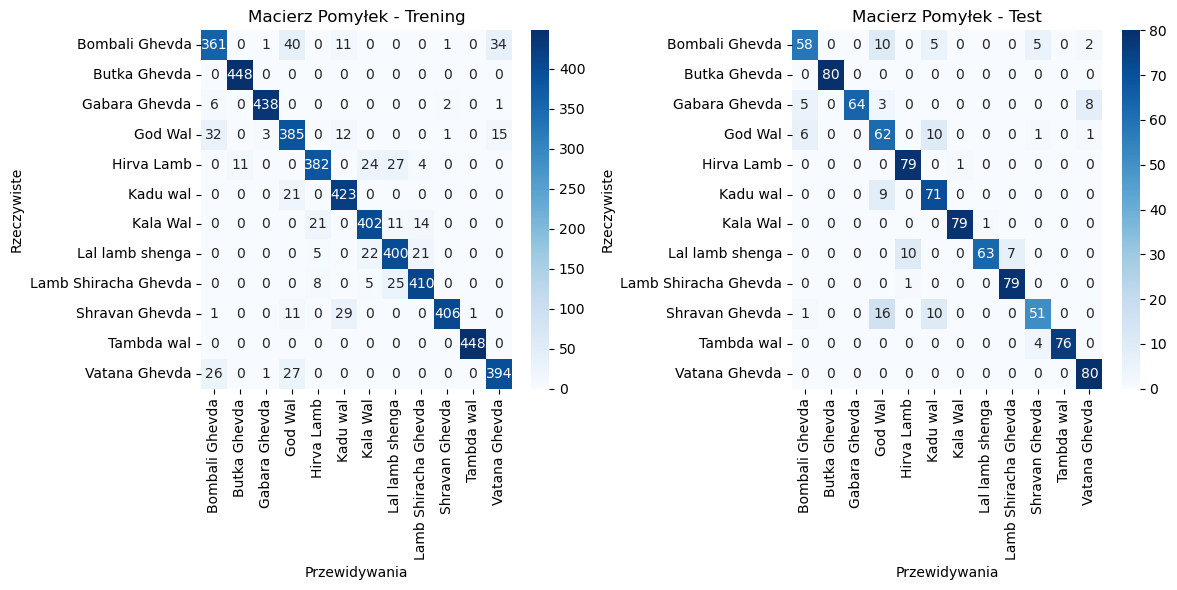

In [76]:
evaluate_model(model3, X_train, X_test, y_train, y_test)


📊 Dokładność (trening): 0.9816
Precision (trening): 0.9818
Recall (trening): 0.9816
F1 Score (trening): 0.9816
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.98      0.95      0.96       448
        Butka Ghevda       1.00      1.00      1.00       448
       Gabara Ghevda       1.00      1.00      1.00       447
             God Wal       0.96      0.98      0.97       448
          Hirva Lamb       1.00      0.96      0.98       448
            Kadu wal       0.96      0.99      0.97       444
            Kala Wal       0.98      0.99      0.98       448
     Lal lamb shenga       0.97      0.98      0.98       448
Lamb Shiracha Ghevda       0.98      1.00      0.99       448
      Shravan Ghevda       1.00      0.97      0.98       448
          Tambda wal       1.00      1.00      1.00       448
       Vatana Ghevda       0.96      0.96      0.96       448

            accuracy                           0

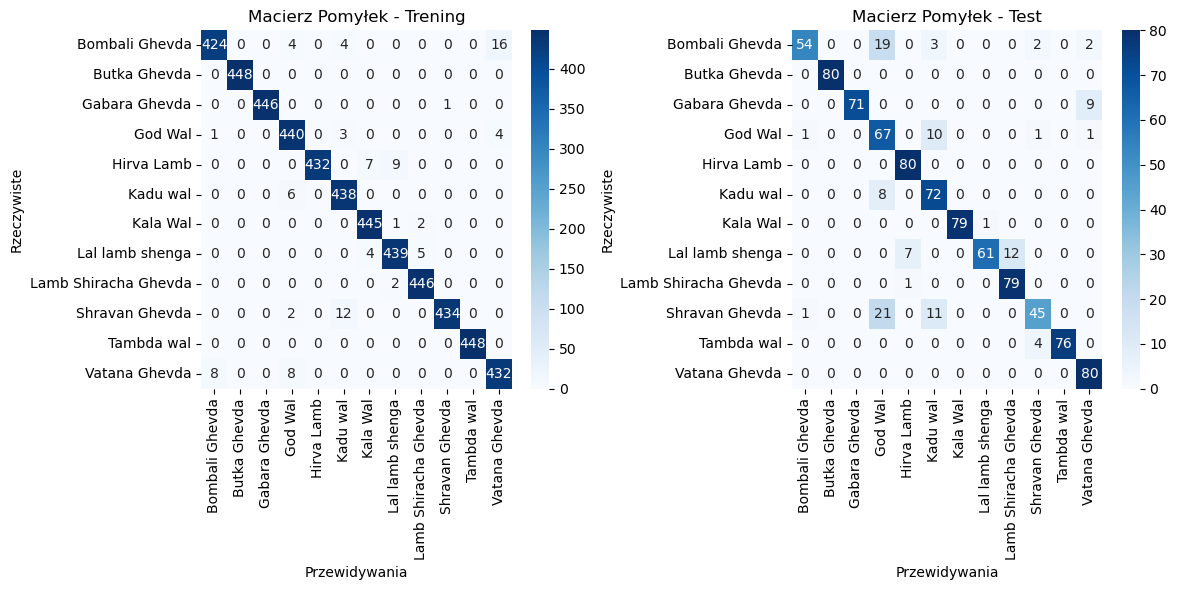

In [77]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
model_soft = VotingClassifier(estimators=estimators, voting='soft', weights=[0.35, 0, 0.65])

evaluate_model(model_soft, X_train, X_test, y_train, y_test)

## Stacking

In [10]:
from sklearn.ensemble import StackingClassifier


📊 Dokładność (trening): 0.9650
Precision (trening): 0.9654
Recall (trening): 0.9650
F1 Score (trening): 0.9647
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.97      0.86      0.91       448
        Butka Ghevda       1.00      1.00      1.00       448
       Gabara Ghevda       1.00      1.00      1.00       447
             God Wal       0.91      0.96      0.94       448
          Hirva Lamb       0.98      0.94      0.96       448
            Kadu wal       0.97      0.99      0.98       444
            Kala Wal       0.95      0.98      0.96       448
     Lal lamb shenga       0.92      0.87      0.89       448
Lamb Shiracha Ghevda       0.92      0.98      0.95       448
      Shravan Ghevda       1.00      1.00      1.00       448
          Tambda wal       1.00      1.00      1.00       448
       Vatana Ghevda       0.97      1.00      0.98       448

            accuracy                           0

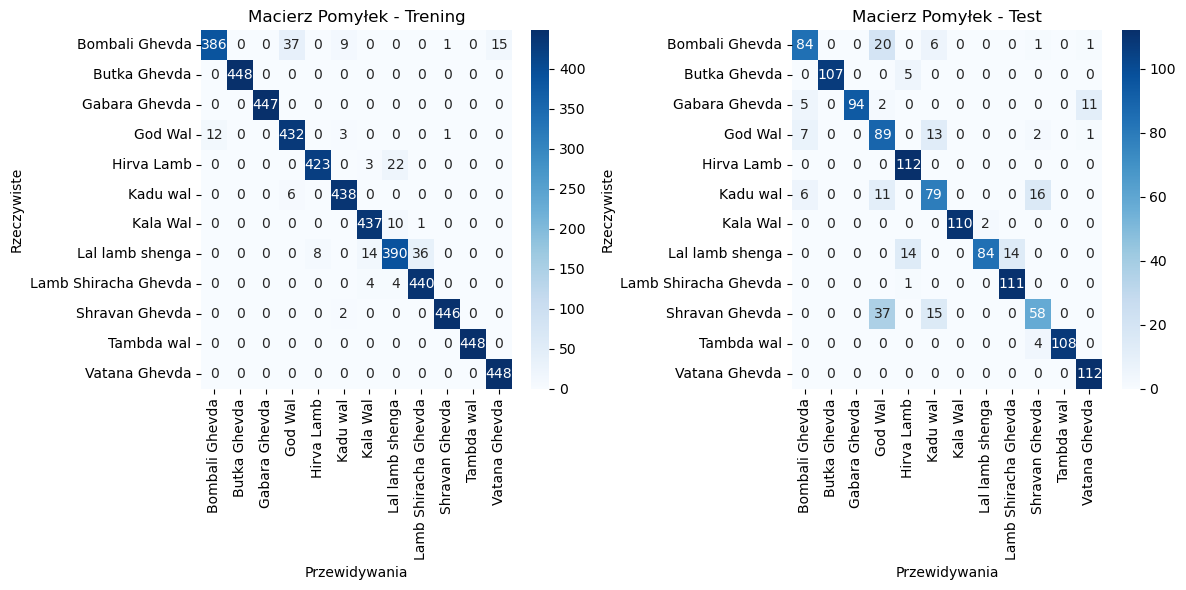

In [11]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

evaluate_model(clf, X_train, X_test, y_train, y_test)

## Bootstrap Aggregating

In [12]:
from sklearn.ensemble import BaggingClassifier


📊 Dokładność (trening): 0.9097
Precision (trening): 0.9110
Recall (trening): 0.9097
F1 Score (trening): 0.9098
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.84      0.81      0.82       448
        Butka Ghevda       0.97      1.00      0.99       448
       Gabara Ghevda       0.99      0.98      0.98       447
             God Wal       0.79      0.85      0.82       448
          Hirva Lamb       0.91      0.85      0.88       448
            Kadu wal       0.89      0.95      0.92       444
            Kala Wal       0.89      0.90      0.89       448
     Lal lamb shenga       0.86      0.89      0.88       448
Lamb Shiracha Ghevda       0.91      0.91      0.91       448
      Shravan Ghevda       0.99      0.90      0.94       448
          Tambda wal       0.99      1.00      1.00       448
       Vatana Ghevda       0.89      0.88      0.88       448

            accuracy                           0

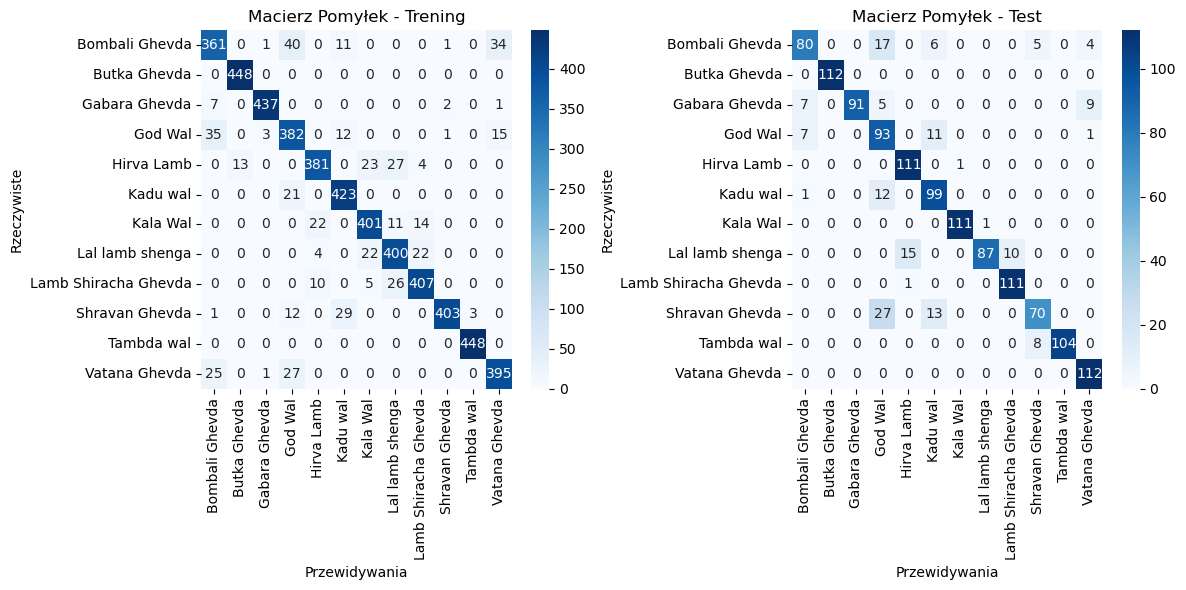

In [13]:
clf = BaggingClassifier(estimator=model3,
                        n_estimators=10)

evaluate_model(clf, X_train, X_test, y_train, y_test)

## Gradient Boosting


📊 Dokładność (trening): 0.8967
Precision (trening): 0.8999
Recall (trening): 0.8967
F1 Score (trening): 0.8969
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.85      0.73      0.78       448
        Butka Ghevda       0.95      0.94      0.95       448
       Gabara Ghevda       0.99      0.92      0.95       447
             God Wal       0.76      0.85      0.81       448
          Hirva Lamb       0.89      0.91      0.90       448
            Kadu wal       0.84      0.97      0.90       444
            Kala Wal       0.94      0.90      0.92       448
     Lal lamb shenga       0.84      0.89      0.86       448
Lamb Shiracha Ghevda       0.92      0.89      0.91       448
      Shravan Ghevda       0.97      0.90      0.93       448
          Tambda wal       0.99      0.97      0.98       448
       Vatana Ghevda       0.87      0.88      0.87       448

            accuracy                           0

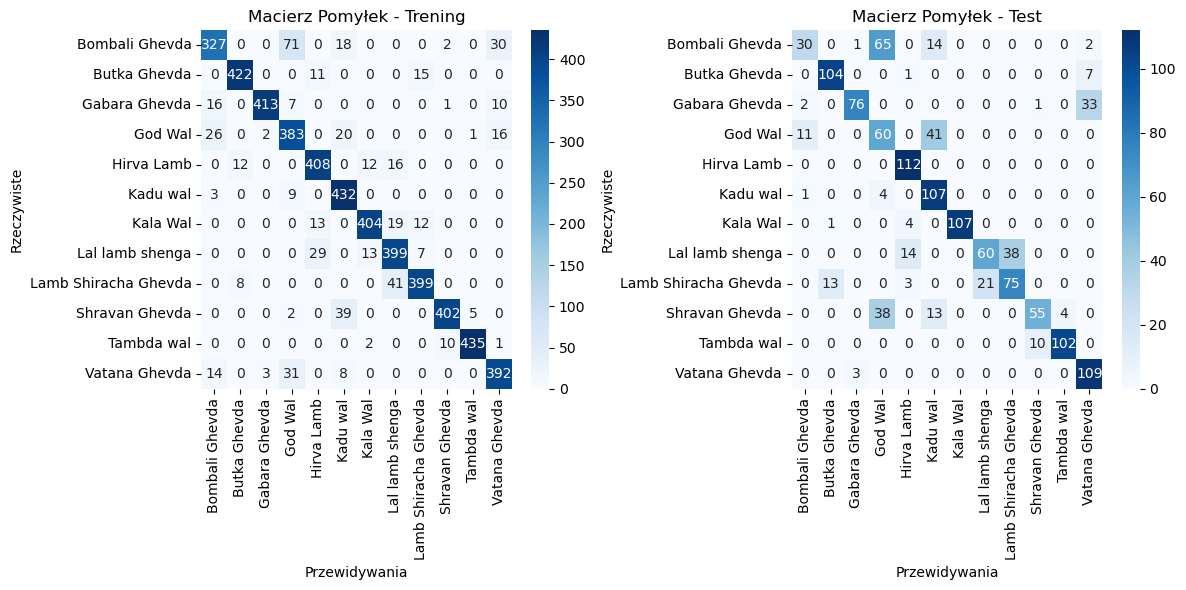

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=1,
                                  learning_rate=0.01) # Szybkość "uczenia" się 

evaluate_model(model, X_train, X_test, y_train, y_test)


📊 Dokładność (trening): 0.9320
Precision (trening): 0.9340
Recall (trening): 0.9320
F1 Score (trening): 0.9314
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.89      0.71      0.79       448
        Butka Ghevda       0.95      0.99      0.97       448
       Gabara Ghevda       0.97      0.98      0.98       447
             God Wal       0.80      0.93      0.86       448
          Hirva Lamb       0.97      0.90      0.94       448
            Kadu wal       0.91      0.98      0.94       444
            Kala Wal       0.97      0.97      0.97       448
     Lal lamb shenga       0.90      0.96      0.93       448
Lamb Shiracha Ghevda       0.96      0.93      0.94       448
      Shravan Ghevda       0.99      0.94      0.96       448
          Tambda wal       1.00      0.99      1.00       448
       Vatana Ghevda       0.91      0.92      0.92       448

            accuracy                           0

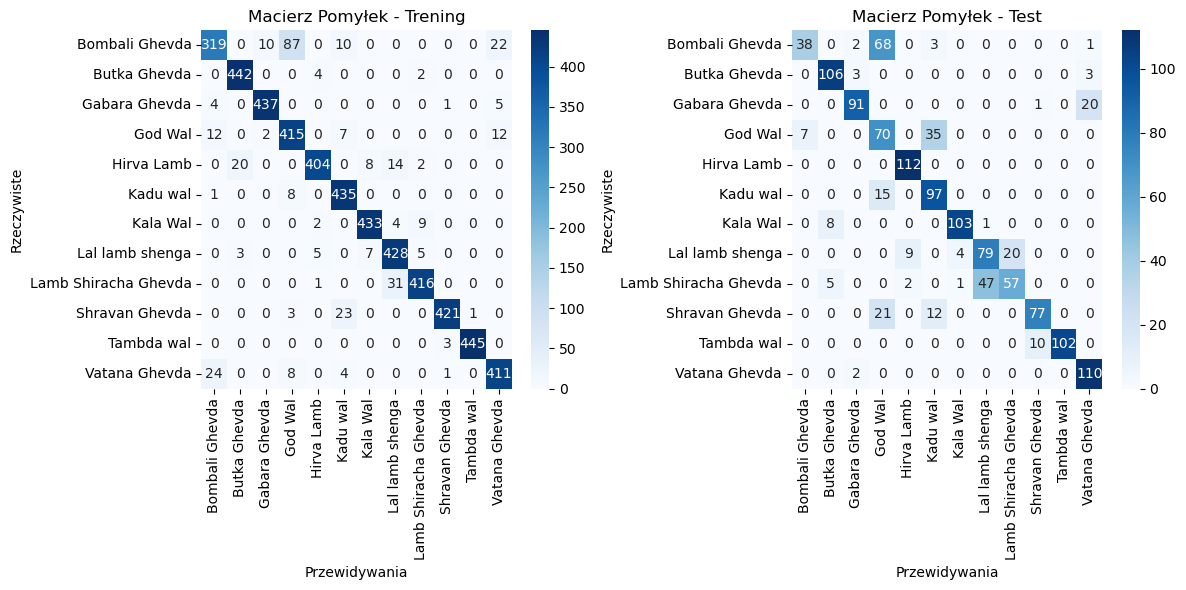

In [15]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Inicjalizacja LabelEncoder
label_encoder = LabelEncoder()

# Zakodowanie etykiet na liczby
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Inicjalizacja modelu XGBClassifier
model = XGBClassifier(random_state=1,
                      learning_rate=0.01, 
                      booster='gbtree', 
                      max_depth=4)


evaluate_model(model, X_train, X_test, y_train, y_test)

In [16]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [17]:
# przygotowanie stacking
def get_stacking():
    
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('cart', DecisionTreeClassifier(random_state=1)))
    level0.append(('rf', RandomForestClassifier(n_estimators=1000, # Ilość słabych estymatorów
                                      max_depth=2, # Maksymalna wysokość drzewa w słabym estymatorze
                                      min_samples_split = 2, # Minimalna ilość obserwacji wymagana do podziału węzła
                                      max_features = 3, # Maksymalna ilość zmiennych brana pod uwagę przy podziale węzła
                                      random_state=0,
                                      n_jobs = -1)))
    level0.append(('aboost', AdaBoostClassifier(random_state=1)))
    level0.append(('gboost', GradientBoostingClassifier(random_state=1,
                                      learning_rate=0.01)))
    level0.append(('xgb', XGBClassifier(random_state=1,
                        learning_rate=0.01, # Szybkość "uczenia" się
                        booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                        max_depth=4 # Maksymalna głębokość drzewa 
                        )))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    
    # definicja meta learner model
    level1 = LogisticRegression()
    
    # definicja stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    
    return model

In [18]:
# lista modeli
def get_models():
    
    models = dict()
    models['lr'] = LogisticRegression()
    models['cart'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier(n_estimators=1000, # Ilość słabych estymatorów
                                      max_depth=2, # Maksymalna wysokość drzewa w słabym estymatorze
                                      min_samples_split = 2, # Minimalna ilość obserwacji wymagana do podziału węzła
                                      max_features = 3, # Maksymalna ilość zmiennych brana pod uwagę przy podziale węzła
                                      random_state=0,
                                      n_jobs = -1)
    models['aboost'] = AdaBoostClassifier(random_state=1)
    models['gboost'] = GradientBoostingClassifier(random_state=1,
                                      learning_rate=0.01)
    models['xgb'] = XGBClassifier(random_state=1,
                        learning_rate=0.01, # Szybkość "uczenia" się
                        booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                        max_depth=4 # Maksymalna głębokość drzewa 
                        )
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()

    return models

In [19]:
# ocena modeli przy wykorzystaniu cross-validation
def evaluate_model(model, X, y):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

    return scores


# Do sprawdzenia istotności cech

In [20]:
clf = RandomForestClassifier(n_estimators=100,  max_depth=7)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [21]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Dokładność modelu: {accuracy:.4f}")
print("Raport klasyfikacji:\n", report)

Dokładność modelu: 0.7466
Raport klasyfikacji:
                       precision    recall  f1-score   support

      Bombali Ghevda       0.77      0.24      0.37       112
        Butka Ghevda       0.93      1.00      0.96       112
       Gabara Ghevda       0.99      0.71      0.83       112
             God Wal       0.32      0.52      0.39       112
          Hirva Lamb       0.89      1.00      0.94       112
            Kadu wal       0.60      0.91      0.72       112
            Kala Wal       1.00      0.98      0.99       112
     Lal lamb shenga       0.61      0.63      0.62       112
Lamb Shiracha Ghevda       0.67      0.52      0.58       112
      Shravan Ghevda       0.88      0.51      0.64       110
          Tambda wal       1.00      0.93      0.96       112
       Vatana Ghevda       0.78      1.00      0.88       112

            accuracy                           0.75      1342
           macro avg       0.79      0.75      0.74      1342
        weighted avg

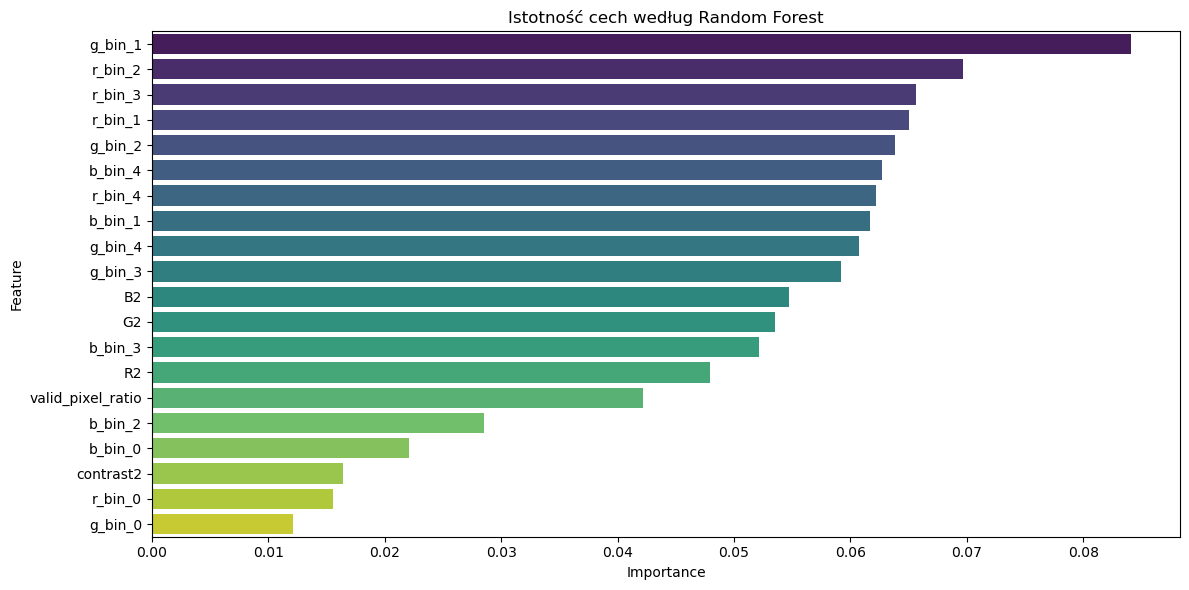

In [22]:
import seaborn as sns
# Tworzymy DataFrame z istotnościami
feature_importance = pd.DataFrame({
    'Feature': train_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"],axis=1).columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Wykres
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Istotność cech według Random Forest')
plt.tight_layout()
plt.show()